# Task # 2

# KMeans Clustring

Importing Libraries

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.cluster import KMeans

# Reading and Analyst a Data

In [72]:
data = pd.read_csv('iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [16]:
data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [17]:
data.shape

(150, 6)

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [31]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [35]:
data.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [41]:
data = data.drop(columns = ['Species' , 'Id'])
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Focuing on SepalLength and PetalLength

Text(0.5, 1.0, 'SepalLength and PetalLength')

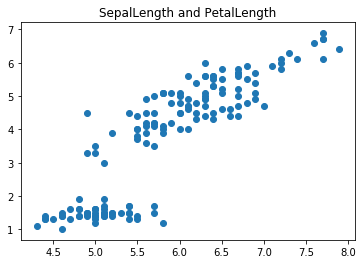

In [50]:
plt.scatter(data.SepalLengthCm , data.PetalLengthCm )
plt.title('SepalLength and PetalLength')

# Finding the optimum number of clusters

In [58]:
# calculating within cluster sum of square
w_sum_square = []
cluster_range = range(1,15)
for k in cluster_range:
    km = KMeans(n_clusters=k)
    km = km.fit(data)
    w_sum_square.append(km.inertia_)

ploting the within cluster sum of squre against cluster range

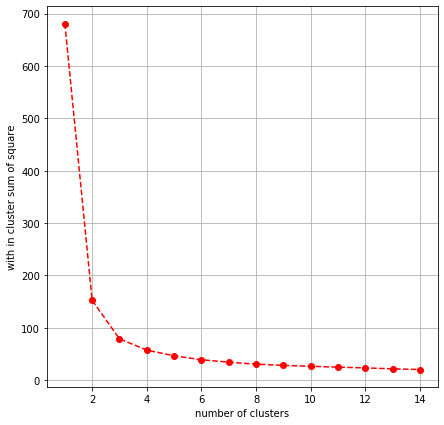

In [64]:
# ploting the within cluster sum of squre against cluster range
plt.figure(figsize=(7,7))
plt.plot(cluster_range , w_sum_square , 'go--' , color = 'r' )
plt.ylabel('with in cluster sum of square')
plt.xlabel('number of clusters')
plt.grid()
plt.show()


# Applying KMeans Clustering on the data

In [66]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 3 , init = 'k-means++' , max_iter = 300 , n_init = 10 , random_state = 0)
prediction = model.fit_predict(data)

# Visualization The Clusters

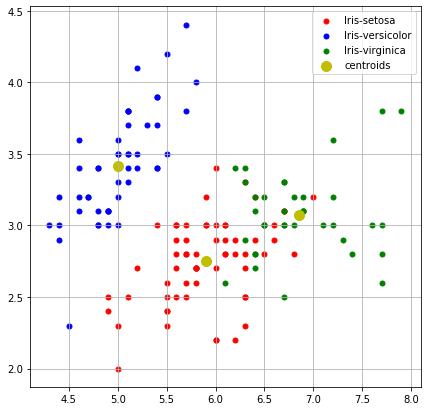

In [71]:
x = data.iloc[: , [0,1,2,3]].values
plt.figure(figsize=(7,7))
plt.scatter(x[prediction == 0,0], x[prediction == 0,1] , s = 25, c = 'r' , label = 'Iris-setosa')
plt.scatter(x[prediction == 1,0], x[prediction == 1,1] , s = 25 ,c = 'b' , label = 'Iris-versicolor')
plt.scatter(x[prediction == 2,0], x[prediction == 2,1] , s = 25 ,c = 'g' , label = 'Iris-virginica')

# ploting the cluster centers

plt.scatter(model.cluster_centers_[: ,0] , model.cluster_centers_[: ,1] , s = 100 , c = 'y' , label = 'centroids')
plt.legend()
plt.grid()
plt.show()